<ipython-input-6-aef3fce91611>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.columns, rotation=45)


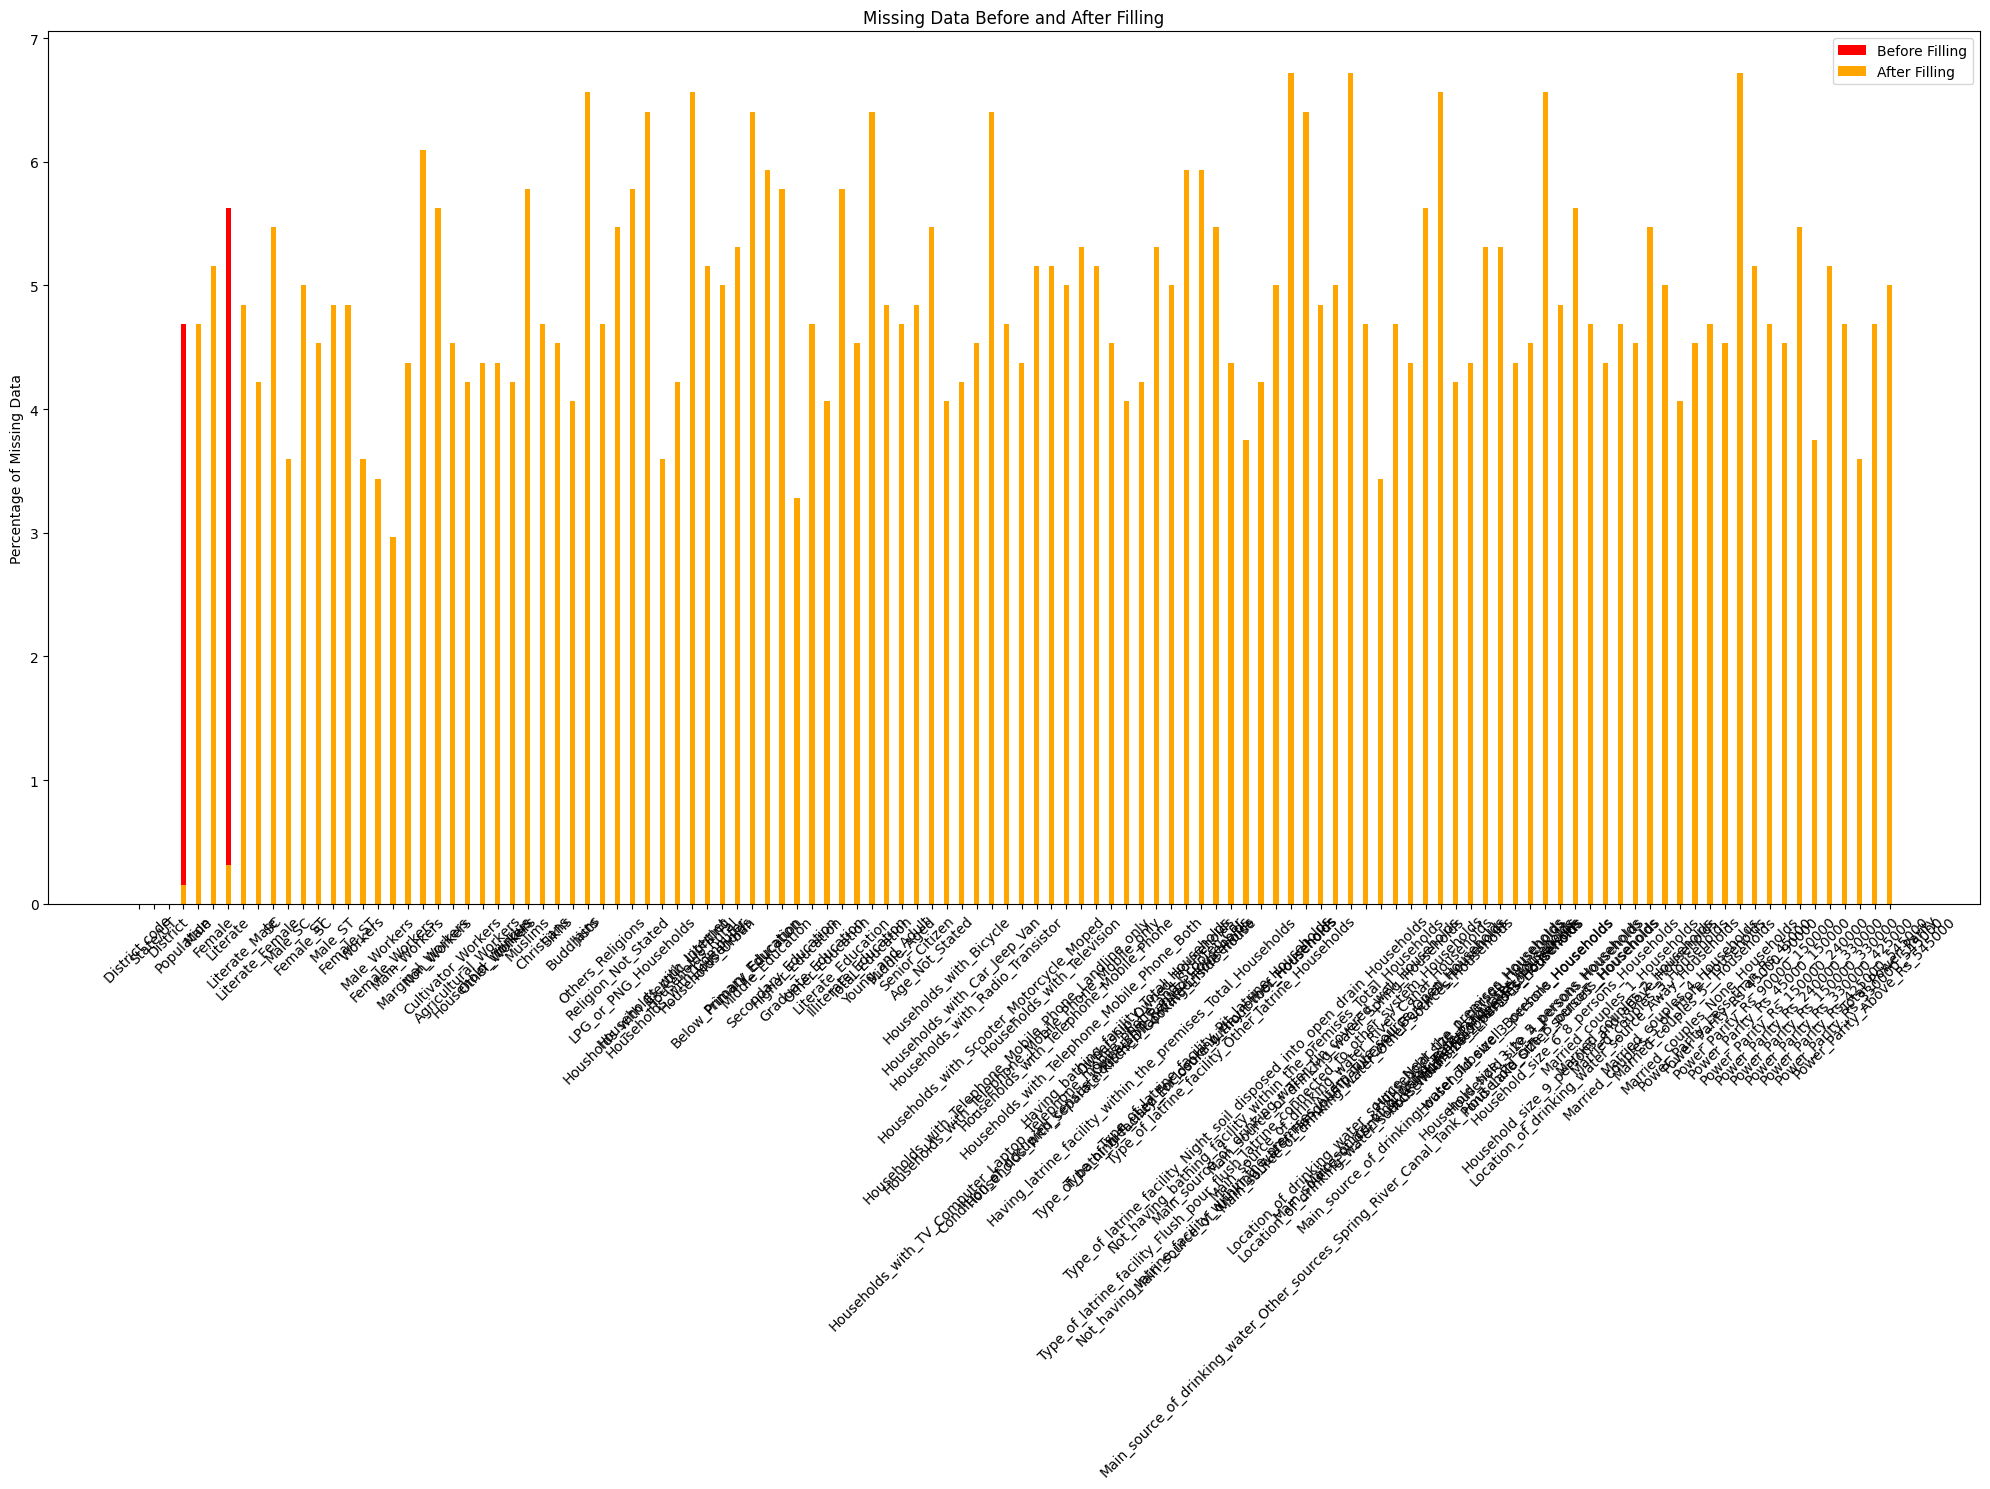

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('modified_file_final.csv')

missing_percentage_before = (df.isnull().sum() / len(df)) * 100
df['Population'].fillna(df['Male'] + df['Female'], inplace=True)
df['Literate'].fillna(df['Literate_Male']+df['Literate_Female'],inplace=True)
df['Population'].fillna(df['Young_and_Adult']+df['Middle_Aged']+df['Senior_Citizen']+df['Age_Not_Stated'])
df['Households'].fillna(df['Households_Rural']+df['Households_Urban'])
missing_percentage_after = (df.isnull().sum() / len(df)) * 100
fig, ax = plt.subplots(figsize=(20, 15))

bar_width = 0.35
before = ax.bar(missing_percentage_before.index, missing_percentage_before, bar_width, label='Before Filling', color='red')
after = ax.bar(missing_percentage_after.index, missing_percentage_after, bar_width, label='After Filling', color='orange')

ax.set_ylabel('Percentage of Missing Data')
ax.set_title('Missing Data Before and After Filling')
ax.set_xticklabels(df.columns, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()

Percentage of Missing Data:
District code                    0.00000
State/UT                         0.00000
District                         0.00000
Population                       4.68750
Male                             4.68750
                                  ...   
Power_Parity_Rs_330000_425000    5.15625
Power_Parity_Rs_425000_545000    4.68750
Power_Parity_Rs_330000_545000    3.59375
Power_Parity_Above_Rs_545000     4.68750
Total_Power_Parity               5.00000
Length: 118, dtype: float64
Percentage of Missing Data After Filling:
District code                    0.00000
State/UT                         0.00000
District                         0.00000
Population                       0.00000
Male                             4.68750
                                  ...   
Power_Parity_Rs_330000_425000    5.15625
Power_Parity_Rs_425000_545000    4.68750
Power_Parity_Rs_330000_545000    3.59375
Power_Parity_Above_Rs_545000     4.68750
Total_Power_Parity               5.00000


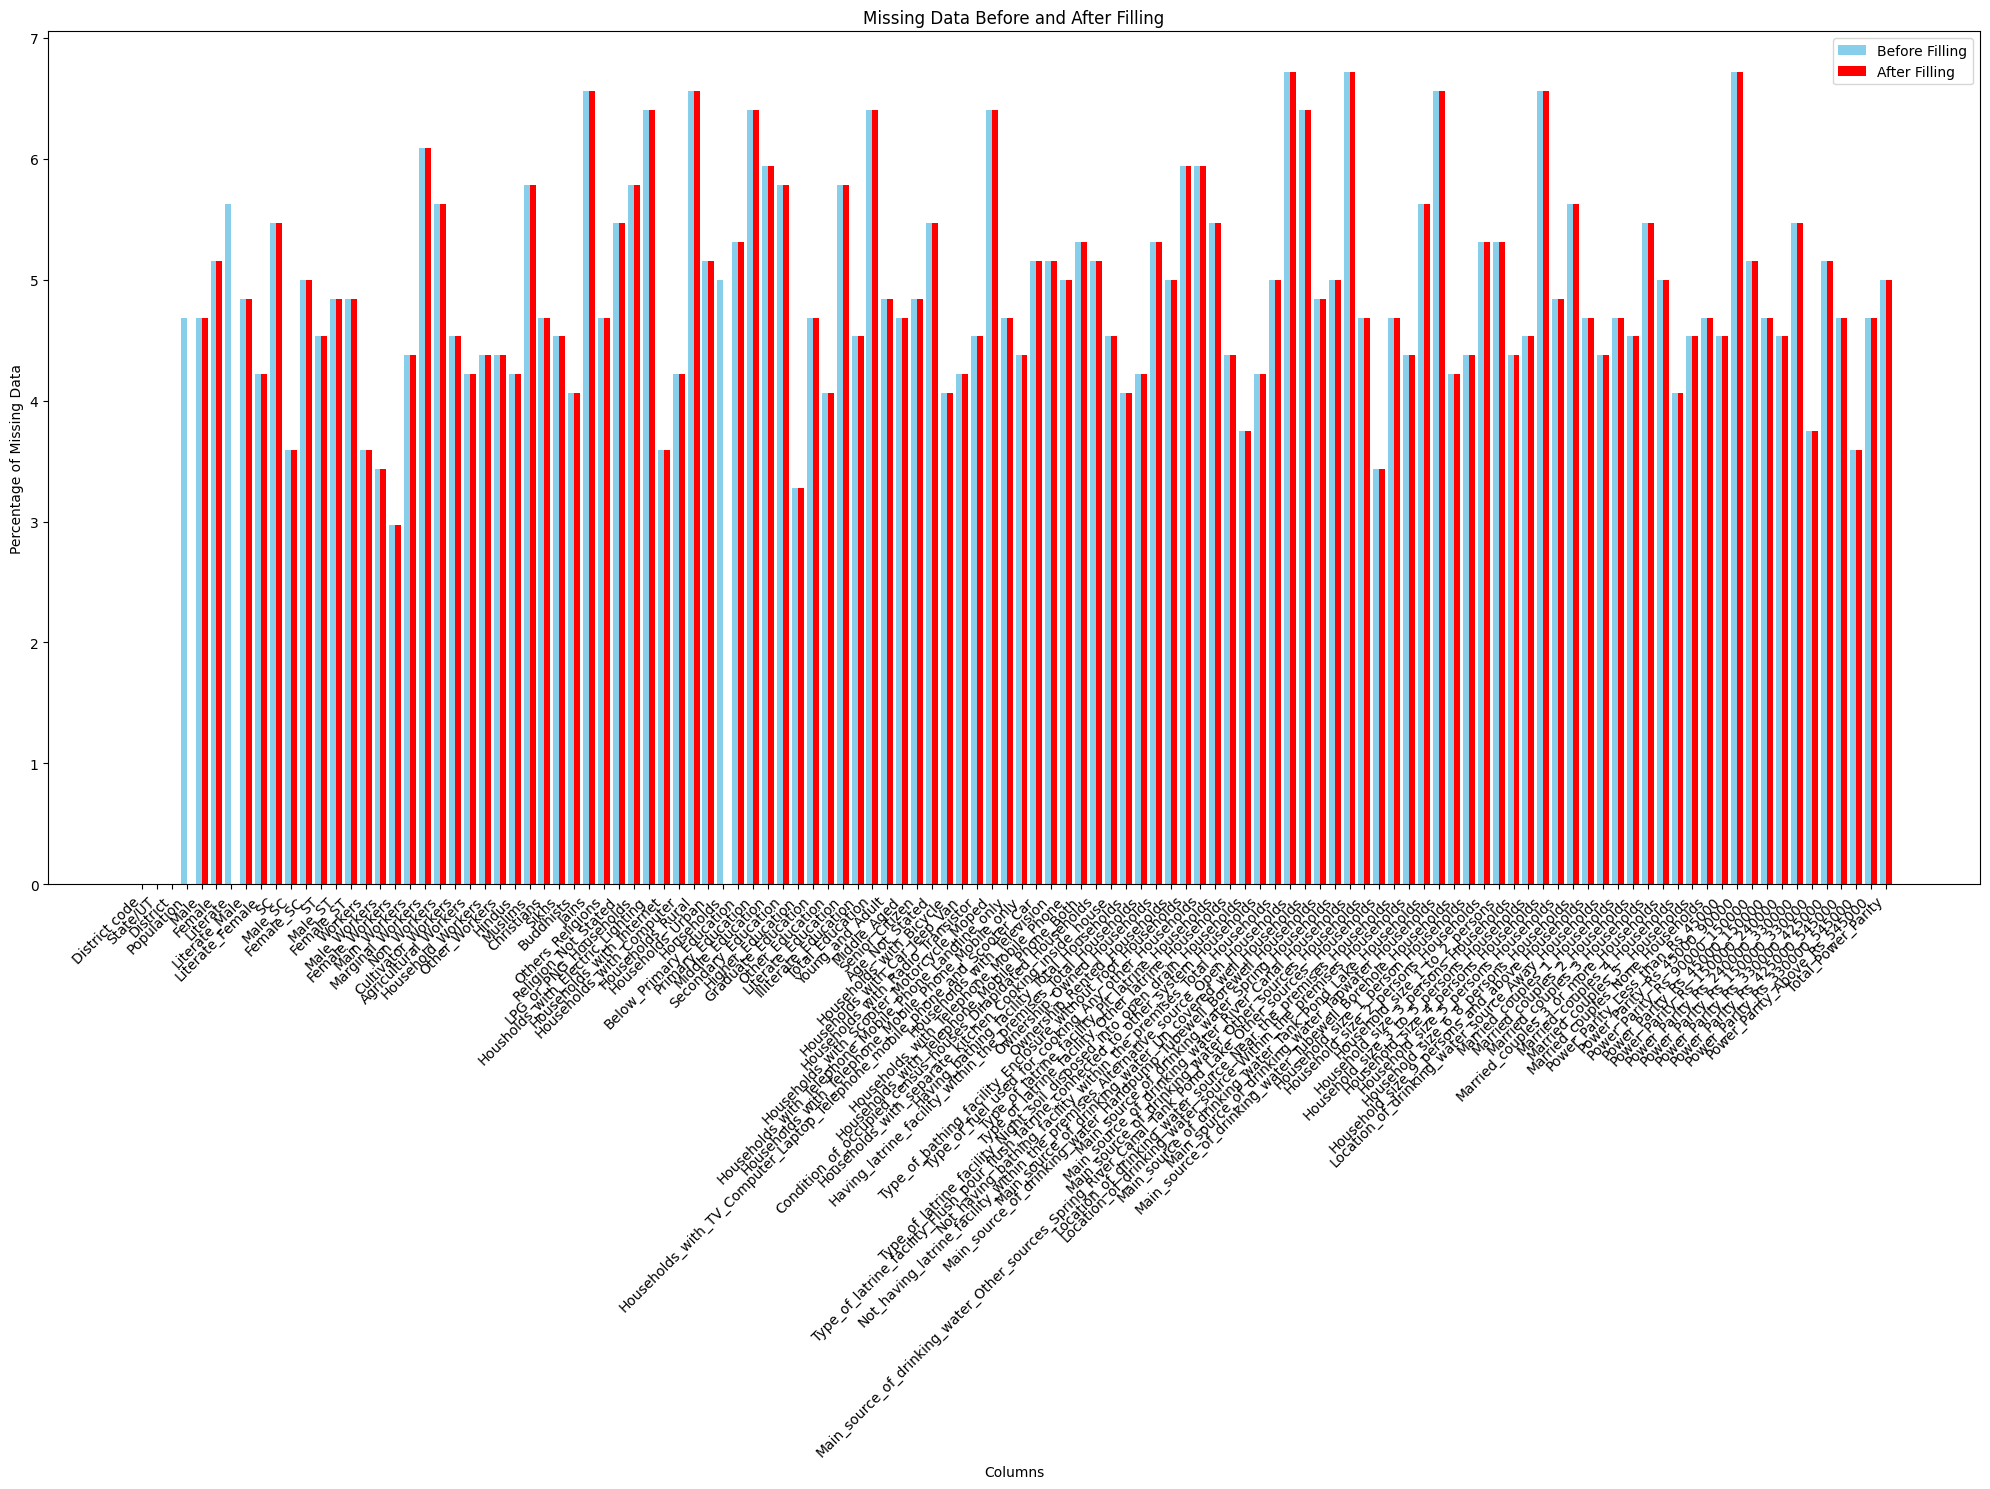

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

census_df = pd.read_csv('modified_file_final.csv')

missing_percentage_before = (census_df.isnull().sum() / len(df)) * 100
print("Percentage of Missing Data:")
print(missing_percentage)

df['Population'] = df['Male'].fillna(0) + df['Female'].fillna(0)
df['Literate'] = df['Literate_Male'].fillna(0) + df['Literate_Female'].fillna(0)
df['Population'] = df['Young_and_Adult'].fillna(0) + df['Middle_Aged'].fillna(0) + df['Senior_Citizen'].fillna(0) + df['Age_Not_Stated'].fillna(0)
df['Households'] = df['Households_Rural'].fillna(0) + df['Households_Urban'].fillna(0)

missing_percentage_after = (df.isnull().sum() / len(df)) * 100
print("Percentage of Missing Data After Filling:")
print(missing_percentage_after)

fig, ax = plt.subplots(figsize=(20, 15))
bar_width = 0.40
index = range(len(df.columns))

bar1 = ax.bar(index, missing_percentage_before, bar_width, label='Before Filling', color='skyblue')
bar2 = ax.bar([i + bar_width for i in index], missing_percentage_after, bar_width, label='After Filling', color='red')

ax.set_xlabel('Columns')
ax.set_ylabel('Percentage of Missing Data')
ax.set_title('Missing Data Before and After Filling')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(df.columns, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

In [7]:
df.to_csv('census.csv',index=False)

In [9]:
import pandas as pd

housing_data = pd.read_csv("housing.csv")
census_data = pd.read_csv("census.csv")

relevant_columns = [
    "District Name",
    "Rural/Urban",
    "Total Number of households",
    "Total Number of Livable",
    "Total Number of Dilapidated",
    "Latrine_premise"
]

relevant_data = housing_data[relevant_columns]

print(relevant_data.head())


merged_data = pd.merge(housing_data, census_data, left_on="District Name", right_on="District")

merged_data['Absolute Dilapidated'] = merged_data['Total Number of households'] * merged_data['Total Number of Dilapidated'] / 100
merged_data['Absolute Latrine_premise'] = merged_data['Total Number of households'] * merged_data['Latrine_premise'] / 100

relevant_columns = [
    "District Name",
    "Rural/Urban",
    "Absolute Dilapidated",
    "Absolute Latrine_premise"
]

# Save to CSV
merged_data.to_csv("Clean_Data/housing.csv", index=False)

# Check for any district data in one file but not the other
districts_only_in_housing = set(merged_data['District Name']) - set(merged_data['District'])
districts_only_in_census = set(merged_data['District']) - set(merged_data['District Name'])

if districts_only_in_housing:
    print("Districts only in housing data:", districts_only_in_housing)
if districts_only_in_census:
    print("Districts only in census data:", districts_only_in_census)


  District Name Rural/Urban  Total Number of households  \
0       Kupwara       Rural                         100   
1       Kupwara       Total                         100   
2       Kupwara       Urban                         100   
3        Badgam       Rural                         100   
4        Badgam       Total                         100   

   Total Number of Livable  Total Number of Dilapidated  Latrine_premise  
0                     58.1                          8.3             48.9  
1                     57.3                          7.9             50.9  
2                     49.5                          4.8             70.2  
3                     46.3                          3.9             83.3  
4                     44.7                          3.8             84.3  


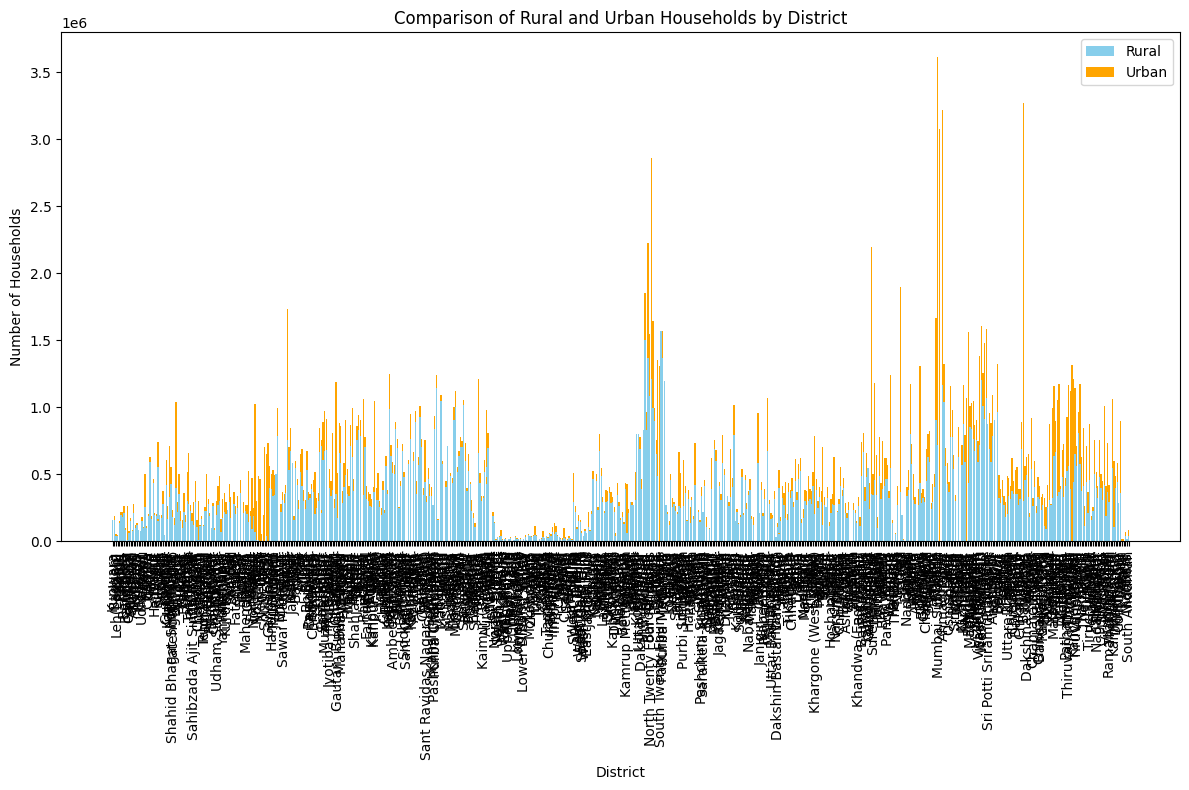

In [44]:
import matplotlib.pyplot as plt

# Number of households for 100 people
households_per_100_people = merged_data['Total Number of households'] / (merged_data['Population'] / 100)
plt.figure(figsize=(10, 6))
plt.bar(merged_data['State Name'], households_per_100_people)
plt.title('Number of Households per 100 People by State')
plt.xlabel('State')
plt.ylabel('Number of Households per 100 People')
plt.xticks(rotation=90)
plt.show()

# Percentage of households that have toilet(s) in premise to the total number of households
toilet_premise_percentage = (merged_data['Absolute Latrine_premise'] / merged_data['Total Number of households']) * 100
plt.figure(figsize=(10, 6))
plt.bar(merged_data['State Name'], toilet_premise_percentage)
plt.title('Percentage of Households with Toilet(s) in Premise by State')
plt.xlabel('State')
plt.ylabel('Percentage of Households with Toilet(s) in Premise')
plt.xticks(rotation=90)
plt.show()

# Urban to rural population ratio


# Assuming you have a DataFrame 'merged_data' containing the household data for rural and urban areas

# Selecting relevant columns
comparison_data = merged_data[['District', 'Households_Rural', 'Households_Urban']]

# Plotting grouped bar chart
plt.figure(figsize=(12, 8))
plt.bar(comparison_data['District'], comparison_data['Households_Rural'], color='skyblue', label='Rural')
plt.bar(comparison_data['District'], comparison_data['Households_Urban'], color='orange', label='Urban', bottom=comparison_data['Households_Rural'])
plt.xlabel('District')
plt.ylabel('Number of Households')
plt.title('Comparison of Rural and Urban Households by District')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()



In [36]:

import pandas as pd

# Load the cleaned housing and census data
housing_data = pd.read_csv("housing.csv")
census_data = pd.read_csv("census.csv")
new_housing_data=pd.read_csv('Clean_Data/housing.csv')

# Merge housing and census data on District name
merged_data = pd.merge(housing_data, census_data, left_on="District Name", right_on="District", suffixes=('_housing', '_census'))

# Calculate the difference between Households_Rural and Households_Urban from housing and census data
merged_data["Difference_Rural"] = abs(merged_data["Total Number of households"] - merged_data["Households_Rural"]) / merged_data["Households_Rural"] * 100
merged_data["Difference_Urban"] = abs(merged_data["Total Number of households"] - merged_data["Households_Urban"]) / merged_data["Households_Urban"] * 100

# Filter districts where the difference is more than 10%
major_difference_districts_rural = merged_data[merged_data["Difference_Rural"] > 10]["District Name"].unique()
major_difference_districts_urban = merged_data[merged_data["Difference_Urban"] > 10]["District Name"].unique()

# Report the names of the districts with major differences
print("Districts with major difference in Households_Rural data:", major_difference_districts_rural)
print("Districts with major difference in Households_Urban data:", major_difference_districts_urban)



Districts with major difference in Households_Rural data: ['Kupwara' 'Badgam' 'Leh(Ladakh)' 'Kargil' 'Punch' 'Rajouri' 'Kathua'
 'Baramula' 'Bandipore' 'Srinagar' 'Ganderbal' 'Pulwama' 'Shupiyan'
 'Anantnag' 'Kulgam' 'Doda' 'Ramban' 'Kishtwar' 'Udhampur' 'Reasi' 'Jammu'
 'Samba' 'Chamba' 'Kangra' 'Kullu' 'Mandi' 'Hamirpur' 'Una' 'Bilaspur'
 'Solan' 'Sirmaur' 'Shimla' 'Kinnaur' 'Gurdaspur' 'Kapurthala' 'Jalandhar'
 'Hoshiarpur' 'Shahid Bhagat Singh Nagar' 'Fatehgarh Sahib' 'Ludhiana'
 'Moga' 'Firozpur' 'Muktsar' 'Faridkot' 'Bathinda' 'Mansa' 'Patiala'
 'Amritsar' 'Tarn Taran' 'Rupnagar' 'Sahibzada Ajit Singh Nagar' 'Sangrur'
 'Barnala' 'Chandigarh' 'Uttarkashi' 'Chamoli' 'Rudraprayag'
 'Tehri Garhwal' 'Dehradun' 'Garhwal' 'Pithoragarh' 'Bageshwar' 'Almora'
 'Champawat' 'Nainital' 'Udham Singh Nagar' 'Hardwar' 'Panchkula' 'Ambala'
 'Yamunanagar' 'Kurukshetra' 'Kaithal' 'Karnal' 'Panipat' 'Jind'
 'Fatehabad' 'Sirsa' 'Bhiwani' 'Jhajjar' 'Mahendragarh' 'Rewari' 'Gurgaon'
 'Mewat' 'Faridabad